In [31]:
import wandb
import matplotlib.pyplot as plt

In [32]:
api = wandb.Api()

ENTITY = "cormaccureton-mcgill-university"
PROJECT = "Decomp"

In [33]:
plt.rcParams.update({'font.size': 18})

In [34]:
runs = api.runs(f"{ENTITY}/{PROJECT}")

In [35]:
report_runs = []
for run in runs:
    if len(run.tags) > 0 and run.tags[0] == "final-results":
        report_runs.append(run)

print(f"Found {len(report_runs)} report runs")

Found 36 report runs


In [36]:
# Group runs by name into a dictionary
runs_by_name = {}
for run in report_runs:
    if run.name not in runs_by_name:
        runs_by_name[run.name] = []
    runs_by_name[run.name].append(run)

print(f"Found {len(runs_by_name)} unique runs")

Found 12 unique runs


In [37]:
# Calculate the average and standard deviation of the runs' accuracies
average_runs = {}
std_runs = {}
for name, runs in runs_by_name.items():
    avg = {}
    std = {}
    for run in runs:
        for key, val in run.summary.items():
            if "accuracy" in key:
                if key not in avg:
                    avg[key] = 0
                    std[key] = 0
                avg[key] += val
                std[key] += val ** 2
    for key in avg.keys():
        avg[key] /= len(runs)
        std[key] = (std[key] / len(runs) - avg[key] ** 2) ** 0.5
    average_runs[name] = avg
    std_runs[name] = std

In [38]:
print(f"Calculated averages and standard deviations")
print(average_runs)
print(std_runs)

Calculated averages and standard deviations
{'zebra-base-eval-zeroshot-1B': {'eval/partial_accuracy': 0.4375429349053291, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.4375429349053291, 'eval_strict_accuracy': 0.0}, 'zebra-base-eval-3shot-1B': {'eval/partial_accuracy': 0.49399841165985947, 'eval/strict_accuracy': 0.006666666666666667, 'eval_partial_accuracy': 0.49399841165985947, 'eval_strict_accuracy': 0.006666666666666667}, 'zebra-base-eval-zeroshot-3B': {'eval/partial_accuracy': 0.5526489050743989, 'eval/strict_accuracy': 0.023333333333333334, 'eval_partial_accuracy': 0.5526489050743989, 'eval_strict_accuracy': 0.023333333333333334}, 'zebra-base-eval-3shot-3B': {'eval/partial_accuracy': 0.6253524913695027, 'eval/strict_accuracy': 0.06999999999999999, 'eval_partial_accuracy': 0.6253524913695027, 'eval_strict_accuracy': 0.06999999999999999}, 'zebra-training-zeroshot-1B': {'eval/partial_accuracy': 0.5207472426912186, 'eval/strict_accuracy': 0.035, 'eval_partial_accuracy': 0.5

In [39]:
# Can add in the SOS results here manually
# average_runs["SOS"] = { ...
sos_averages = {'sudoku-sos-eval-zeroshot-1B-1000samples': {'eval/partial_accuracy': 0.06528600823045268, 'eval/partial_accuracy_adjusted': -0.3357377116287663, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.06528600823045268, 'eval_partial_accuracy_adjusted': -0.3357377116287663, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-3shot-1B-1000samples': {'eval/partial_accuracy': 0.09668106995884773, 'eval/partial_accuracy_adjusted': -0.29045554835936366, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.09668106995884773, 'eval_partial_accuracy_adjusted': -0.29045554835936366, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-zeroshot-1B-10000samples': {'eval/partial_accuracy': 0.05970987654320988, 'eval/partial_accuracy_adjusted': -0.3433231986796705, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.05970987654320988, 'eval_partial_accuracy_adjusted': -0.3433231986796705, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-3shot-1B-10000samples': {'eval/partial_accuracy': 0.11325925925925927, 'eval/partial_accuracy_adjusted': -0.2673387559388169, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.11325925925925927, 'eval_partial_accuracy_adjusted': -0.2673387559388169, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-zeroshot-3B-10000samples': {'eval/partial_accuracy': 0.10613786008230452, 'eval/partial_accuracy_adjusted': -0.27710734653145513, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.10613786008230452, 'eval_partial_accuracy_adjusted': -0.27710734653145513, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-3shot-3B-10000samples': {'eval/partial_accuracy': 0.10829012345679012, 'eval/partial_accuracy_adjusted': -0.27395741628235803, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.10829012345679012, 'eval_partial_accuracy_adjusted': -0.27395741628235803, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-zeroshot-3B-1000samples': {'eval/partial_accuracy': 0.10619547325102881, 'eval/partial_accuracy_adjusted': -0.2767593221948161, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.10619547325102881, 'eval_partial_accuracy_adjusted': -0.2767593221948161, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-3shot-3B-1000samples': {'eval/partial_accuracy': 0.10859259259259259, 'eval/partial_accuracy_adjusted': -0.2738922023259868, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.10859259259259259, 'eval_partial_accuracy_adjusted': -0.2738922023259868, 'eval_strict_accuracy': 0.0}, 'zebra-sos-eval-zeroshot-1B-1000samples': {'eval/partial_accuracy': 0.43111257172324463, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.43111257172324463, 'eval_strict_accuracy': 0.0}, 'zebra-sos-eval-3shot-1B-1000samples': {'eval/partial_accuracy': 0.48774394721019315, 'eval/strict_accuracy': 0.0033333333333333335, 'eval_partial_accuracy': 0.48774394721019315, 'eval_strict_accuracy': 0.0033333333333333335}, 'zebra-sos-eval-zeroshot-1B-10000samples': {'eval/partial_accuracy': 0.4262079723196291, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.4262079723196291, 'eval_strict_accuracy': 0.0}, 'zebra-sos-eval-3shot-1B-10000samples': {'eval/partial_accuracy': 0.4930293401633838, 'eval/strict_accuracy': 0.018333333333333333, 'eval_partial_accuracy': 0.4930293401633838, 'eval_strict_accuracy': 0.018333333333333333}, 'zebra-sos-eval-zeroshot-3B-1000samples': {'eval/partial_accuracy': 0.5806737761652169, 'eval/strict_accuracy': 0.021666666666666667, 'eval_partial_accuracy': 0.5806737761652169, 'eval_strict_accuracy': 0.021666666666666667}, 'zebra-sos-eval-3shot-3B-1000samples': {'eval/partial_accuracy': 0.623217280987538, 'eval/strict_accuracy': 0.06, 'eval_partial_accuracy': 0.623217280987538, 'eval_strict_accuracy': 0.06}, 'zebra-sos-eval-zeroshot-3B-10000samples': {'eval/partial_accuracy': 0.5881301947388119, 'eval/strict_accuracy': 0.023333333333333334, 'eval_partial_accuracy': 0.5881301947388119, 'eval_strict_accuracy': 0.023333333333333334}, 'zebra-sos-eval-3shot-3B-10000samples': {'eval/partial_accuracy': 0.6246409216367267, 'eval/strict_accuracy': 0.07, 'eval_partial_accuracy': 0.6246409216367267, 'eval_strict_accuracy': 0.07}}
sos_stds = {'sudoku-sos-eval-zeroshot-1B-1000samples': {'eval/partial_accuracy': 0.0008336508057565481, 'eval/partial_accuracy_adjusted': 0.0012960135726484353, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.0008336508057565481, 'eval_partial_accuracy_adjusted': 0.0012960135726484353, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-3shot-1B-1000samples': {'eval/partial_accuracy': 0.000797377537105993, 'eval/partial_accuracy_adjusted': 0.000794673283572589, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.000797377537105993, 'eval_partial_accuracy_adjusted': 0.000794673283572589, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-zeroshot-1B-10000samples': {'eval/partial_accuracy': 0.0004788097233822488, 'eval/partial_accuracy_adjusted': 0.0008196702082566821, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.0004788097233822488, 'eval_partial_accuracy_adjusted': 0.0008196702082566821, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-3shot-1B-10000samples': {'eval/partial_accuracy': 0.0008478315101306414, 'eval/partial_accuracy_adjusted': 0.0012247935636185722, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.0008478315101306414, 'eval_partial_accuracy_adjusted': 0.0012247935636185722, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-zeroshot-3B-10000samples': {'eval/partial_accuracy': 7.84595718708633e-05, 'eval/partial_accuracy_adjusted': 0.00013560767374362376, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 7.84595718708633e-05, 'eval_partial_accuracy_adjusted': 0.00013560767374362376, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-3shot-3B-10000samples': {'eval/partial_accuracy': 0.0006489021677191418, 'eval/partial_accuracy_adjusted': 0.0009732440331102179, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.0006489021677191418, 'eval_partial_accuracy_adjusted': 0.0009732440331102179, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-zeroshot-3B-1000samples': {'eval/partial_accuracy': 0.0007109284268462049, 'eval/partial_accuracy_adjusted': 0.0016282960130069135, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.0007109284268462049, 'eval_partial_accuracy_adjusted': 0.0016282960130069135, 'eval_strict_accuracy': 0.0}, 'sudoku-sos-eval-3shot-3B-1000samples': {'eval/partial_accuracy': 0.0006710153851496667, 'eval/partial_accuracy_adjusted': 0.0009004624762709385, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.0006710153851496667, 'eval_partial_accuracy_adjusted': 0.0009004624762709385, 'eval_strict_accuracy': 0.0}, 'zebra-sos-eval-zeroshot-1B-1000samples': {'eval/partial_accuracy': 0.0045975991275008085, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.0045975991275008085, 'eval_strict_accuracy': 0.0}, 'zebra-sos-eval-3shot-1B-1000samples': {'eval/partial_accuracy': 0.00217535217038563, 'eval/strict_accuracy': 0.004714045207910317, 'eval_partial_accuracy': 0.00217535217038563, 'eval_strict_accuracy': 0.004714045207910317}, 'zebra-sos-eval-zeroshot-1B-10000samples': {'eval/partial_accuracy': 0.004817207138651865, 'eval/strict_accuracy': 0.0, 'eval_partial_accuracy': 0.004817207138651865, 'eval_strict_accuracy': 0.0}, 'zebra-sos-eval-3shot-1B-10000samples': {'eval/partial_accuracy': 0.004833023573903498, 'eval/strict_accuracy': 0.006236095644623238, 'eval_partial_accuracy': 0.004833023573903498, 'eval_strict_accuracy': 0.006236095644623238}, 'zebra-sos-eval-zeroshot-3B-1000samples': {'eval/partial_accuracy': 0.00646301948536338, 'eval/strict_accuracy': 0.0062360956446232295, 'eval_partial_accuracy': 0.00646301948536338, 'eval_strict_accuracy': 0.0062360956446232295}, 'zebra-sos-eval-3shot-3B-1000samples': {'eval/partial_accuracy': 0.002610803845636642, 'eval/strict_accuracy': 0.008164965809277289, 'eval_partial_accuracy': 0.002610803845636642, 'eval_strict_accuracy': 0.008164965809277289}, 'zebra-sos-eval-zeroshot-3B-10000samples': {'eval/partial_accuracy': 0.008009096045455306, 'eval/strict_accuracy': 0.012472191289246473, 'eval_partial_accuracy': 0.008009096045455306, 'eval_strict_accuracy': 0.012472191289246473}, 'zebra-sos-eval-3shot-3B-10000samples': {'eval/partial_accuracy': 0.006594511366009737, 'eval/strict_accuracy': 0.008164965809277235, 'eval_partial_accuracy': 0.006594511366009737, 'eval_strict_accuracy': 0.008164965809277235}}

average_runs = {**average_runs, **sos_averages}
std_runs = {**std_runs, **sos_stds}

In [40]:
def combine_avg_std(avg, std):
    combined = {}
    for key in avg.keys():
        combined[key] = (avg[key], std[key])
    return combined

In [41]:
# Split between zebra and sudoku
zebra_runs = {}
sudoku_runs = {}
for name, runs in average_runs.items():
    if "zebra" in name:
        zebra_runs[name] = combine_avg_std(runs, std_runs[name])
    else:
        sudoku_runs[name] = combine_avg_std(runs, std_runs[name])

In [42]:
print(zebra_runs.keys())

print(sudoku_runs.keys())

dict_keys(['zebra-base-eval-zeroshot-1B', 'zebra-base-eval-3shot-1B', 'zebra-base-eval-zeroshot-3B', 'zebra-base-eval-3shot-3B', 'zebra-training-zeroshot-1B', 'zebra-training-zeroshot-3B', 'zebra-sos-eval-zeroshot-1B-1000samples', 'zebra-sos-eval-3shot-1B-1000samples', 'zebra-sos-eval-zeroshot-1B-10000samples', 'zebra-sos-eval-3shot-1B-10000samples', 'zebra-sos-eval-zeroshot-3B-1000samples', 'zebra-sos-eval-3shot-3B-1000samples', 'zebra-sos-eval-zeroshot-3B-10000samples', 'zebra-sos-eval-3shot-3B-10000samples'])
dict_keys(['sudoku-base-eval-zeroshot-1B', 'sudoku-base-eval-3shot-1B', 'sudoku-base-eval-zeroshot-3B', 'sudoku-base-eval-3shot-3B', 'sudoku-training-zeroshot-3B', 'sudoku-training-zeroshot-1B', 'sudoku-sos-eval-zeroshot-1B-1000samples', 'sudoku-sos-eval-3shot-1B-1000samples', 'sudoku-sos-eval-zeroshot-1B-10000samples', 'sudoku-sos-eval-3shot-1B-10000samples', 'sudoku-sos-eval-zeroshot-3B-10000samples', 'sudoku-sos-eval-3shot-3B-10000samples', 'sudoku-sos-eval-zeroshot-3B-1000s

In [43]:
print(zebra_runs.values())

print(sudoku_runs.values())

dict_values([{'eval/partial_accuracy': (0.4375429349053291, 0.004396998776541963), 'eval/strict_accuracy': (0.0, 0.0), 'eval_partial_accuracy': (0.4375429349053291, 0.004396998776541963), 'eval_strict_accuracy': (0.0, 0.0)}, {'eval/partial_accuracy': (0.49399841165985947, 0.005449822356046041), 'eval/strict_accuracy': (0.006666666666666667, 0.002357022603955157), 'eval_partial_accuracy': (0.49399841165985947, 0.005449822356046041), 'eval_strict_accuracy': (0.006666666666666667, 0.002357022603955157)}, {'eval/partial_accuracy': (0.5526489050743989, 0.008268578085981346), 'eval/strict_accuracy': (0.023333333333333334, 0.0023570226039551514), 'eval_partial_accuracy': (0.5526489050743989, 0.008268578085981346), 'eval_strict_accuracy': (0.023333333333333334, 0.0023570226039551514)}, {'eval/partial_accuracy': (0.6253524913695027, 0.007289294034596861), 'eval/strict_accuracy': (0.06999999999999999, 0.01471960144387976), 'eval_partial_accuracy': (0.6253524913695027, 0.007289294034596861), 'eva

In [58]:
def plot_results(runs, key, title, ylabel, legend_loc='upper left'):
    fig, ax = plt.subplots()
    bar_width = 0.1
    # make the plot larger
    fig.set_size_inches(18, 14)

    grouped_accuracies  = {
        'Base Model (Zero Shot)': {k: v for k, v in runs.items() if 'base-eval-zeroshot' in k},
        'Base Model (Three Shot)': {k: v for k, v in runs.items() if 'base-eval-3shot' in k},
        'SFT LoRA Model (Zero Shot)': {k: v for k, v in runs.items() if 'training-zeroshot' in k},
        # TODO: Include the SoS results once available
        'SoS LoRA Model - 1000 samples (Zero Shot)': {k: v for k, v in runs.items() if 'sos-eval-zeroshot' in k and '1000samples' in k},
        'SoS LoRA Model - 1000 samples (Three Shot)': {k: v for k, v in runs.items() if 'sos-eval-3shot' in k and '1000samples' in k},
        'SoS LoRA Model - 10000 samples (Zero Shot)': {k: v for k, v in runs.items() if 'sos-eval-zeroshot' in k and '10000samples' in k},
        'SoS LoRA Model - 10000 samples (Three Shot)': {k: v for k, v in runs.items() if 'sos-eval-3shot' in k and '10000samples' in k},
    }

    # Plot grouped bar chart
    labels = ['1B', '3B']
    offset = bar_width * (len(grouped_accuracies) - 1) / 2
    x = [1, 2]


    # Plot bars for each group
    for i, (group, accuracies) in enumerate(grouped_accuracies.items()):
        partial_accuracies = [entry[key][0] for entry in accuracies.values()]
        errors = [entry[key][1] for entry in accuracies.values()]
        ax.bar(x=[xi + i * bar_width for xi in x], height=partial_accuracies, width=bar_width, label=group)
        ax.errorbar(x=[xi + i * bar_width for xi in x], y=partial_accuracies, yerr=errors, fmt='none', capsize=5,color='black')


    # Add labels and title
    ax.set_xlabel('Model Size')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks([xi + offset for xi in x])
    ax.set_xticklabels(labels)
    ax.legend(loc=legend_loc)

    plt.show()

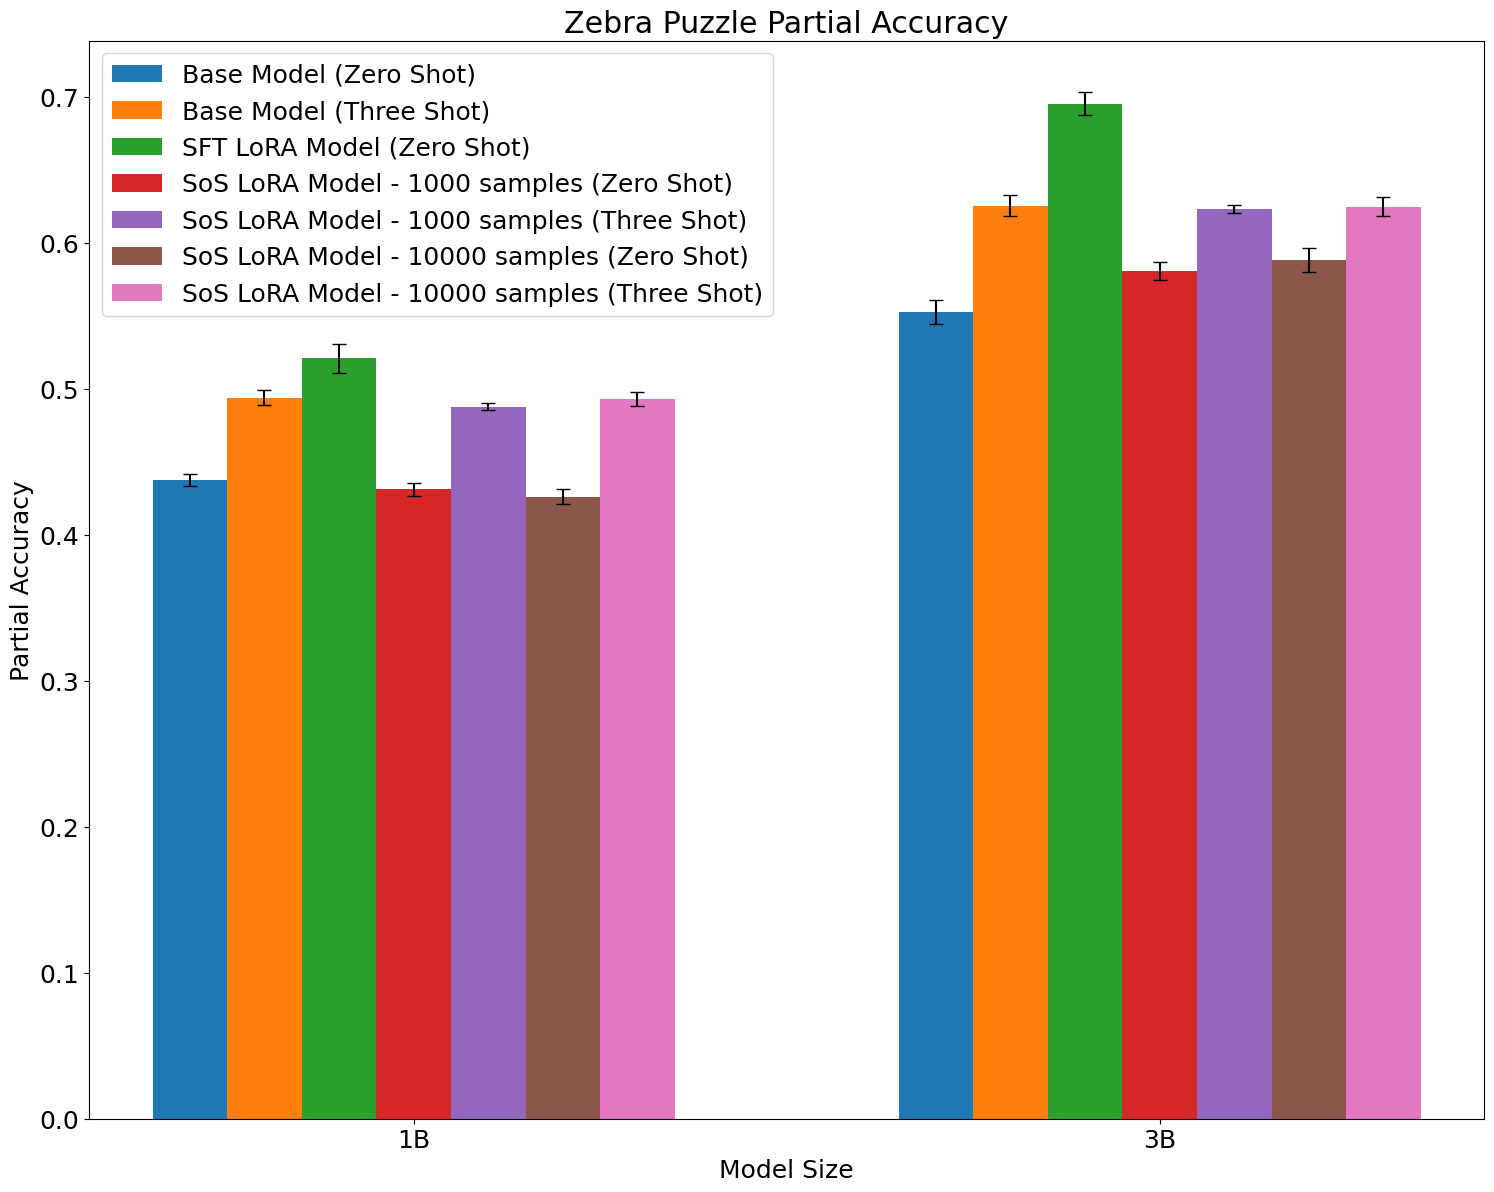

In [59]:
plot_results(zebra_runs, 'eval/partial_accuracy', 'Zebra Puzzle Partial Accuracy', 'Partial Accuracy')

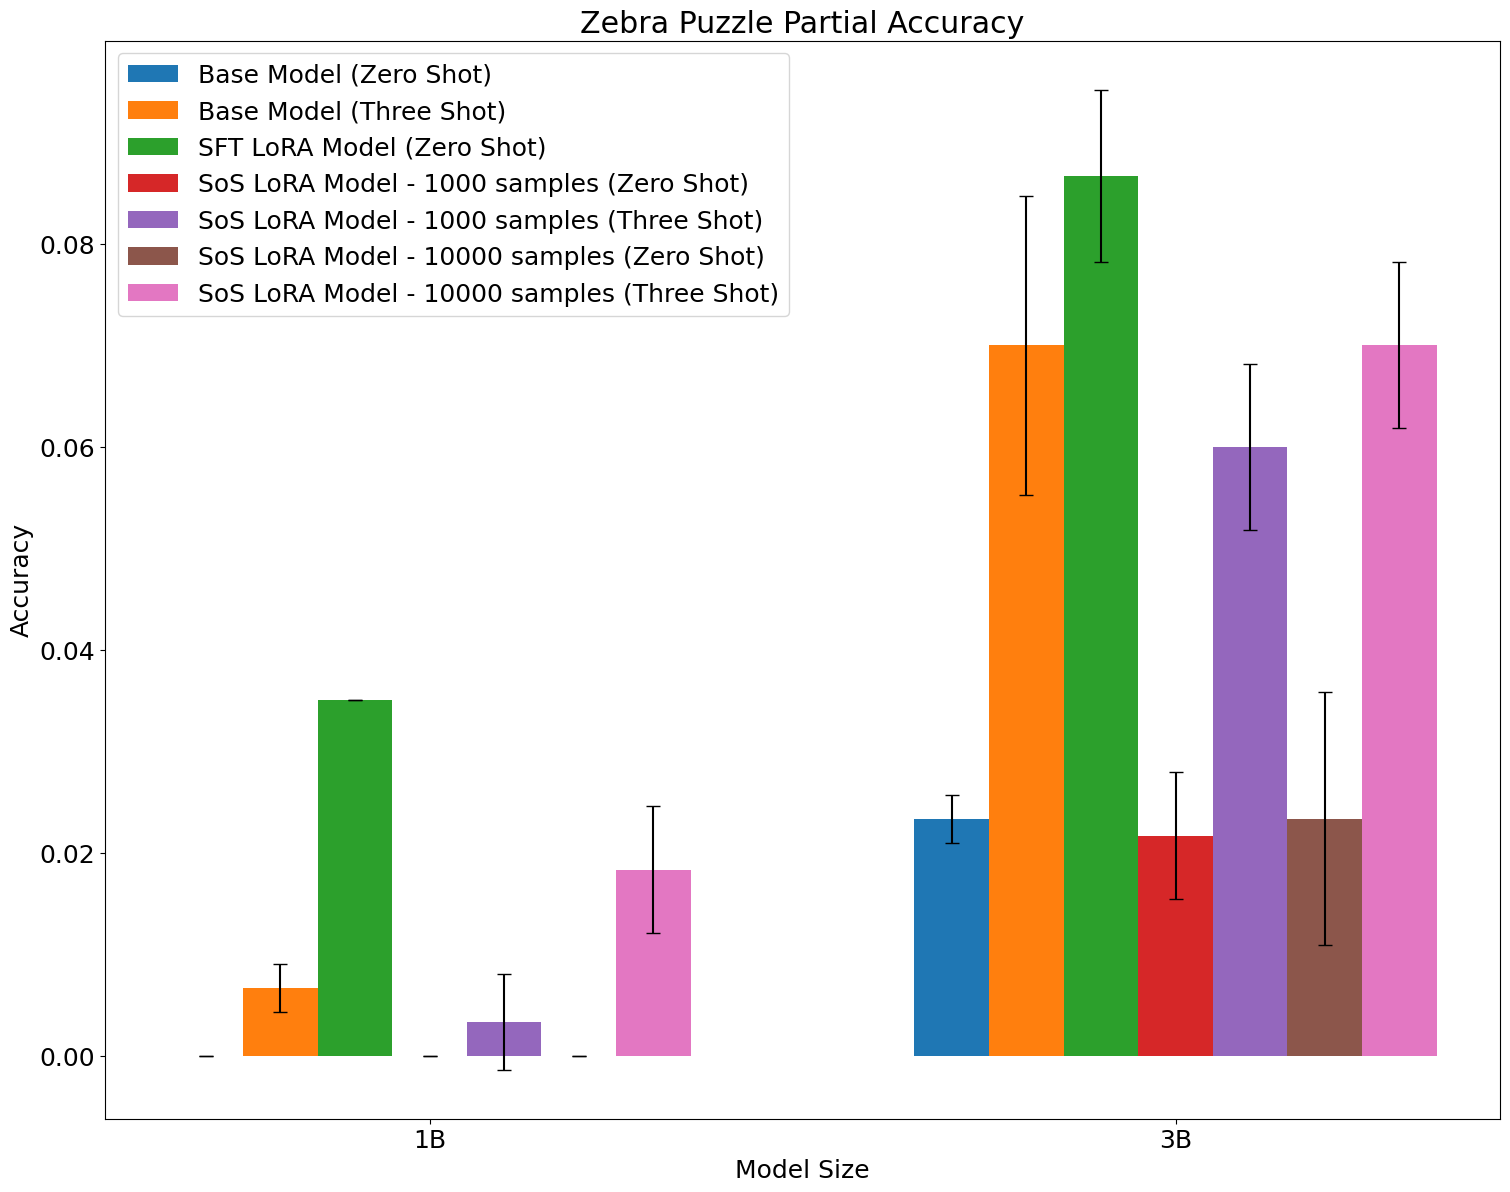

In [60]:
plot_results(zebra_runs, 'eval/strict_accuracy', 'Zebra Puzzle Partial Accuracy', 'Accuracy')

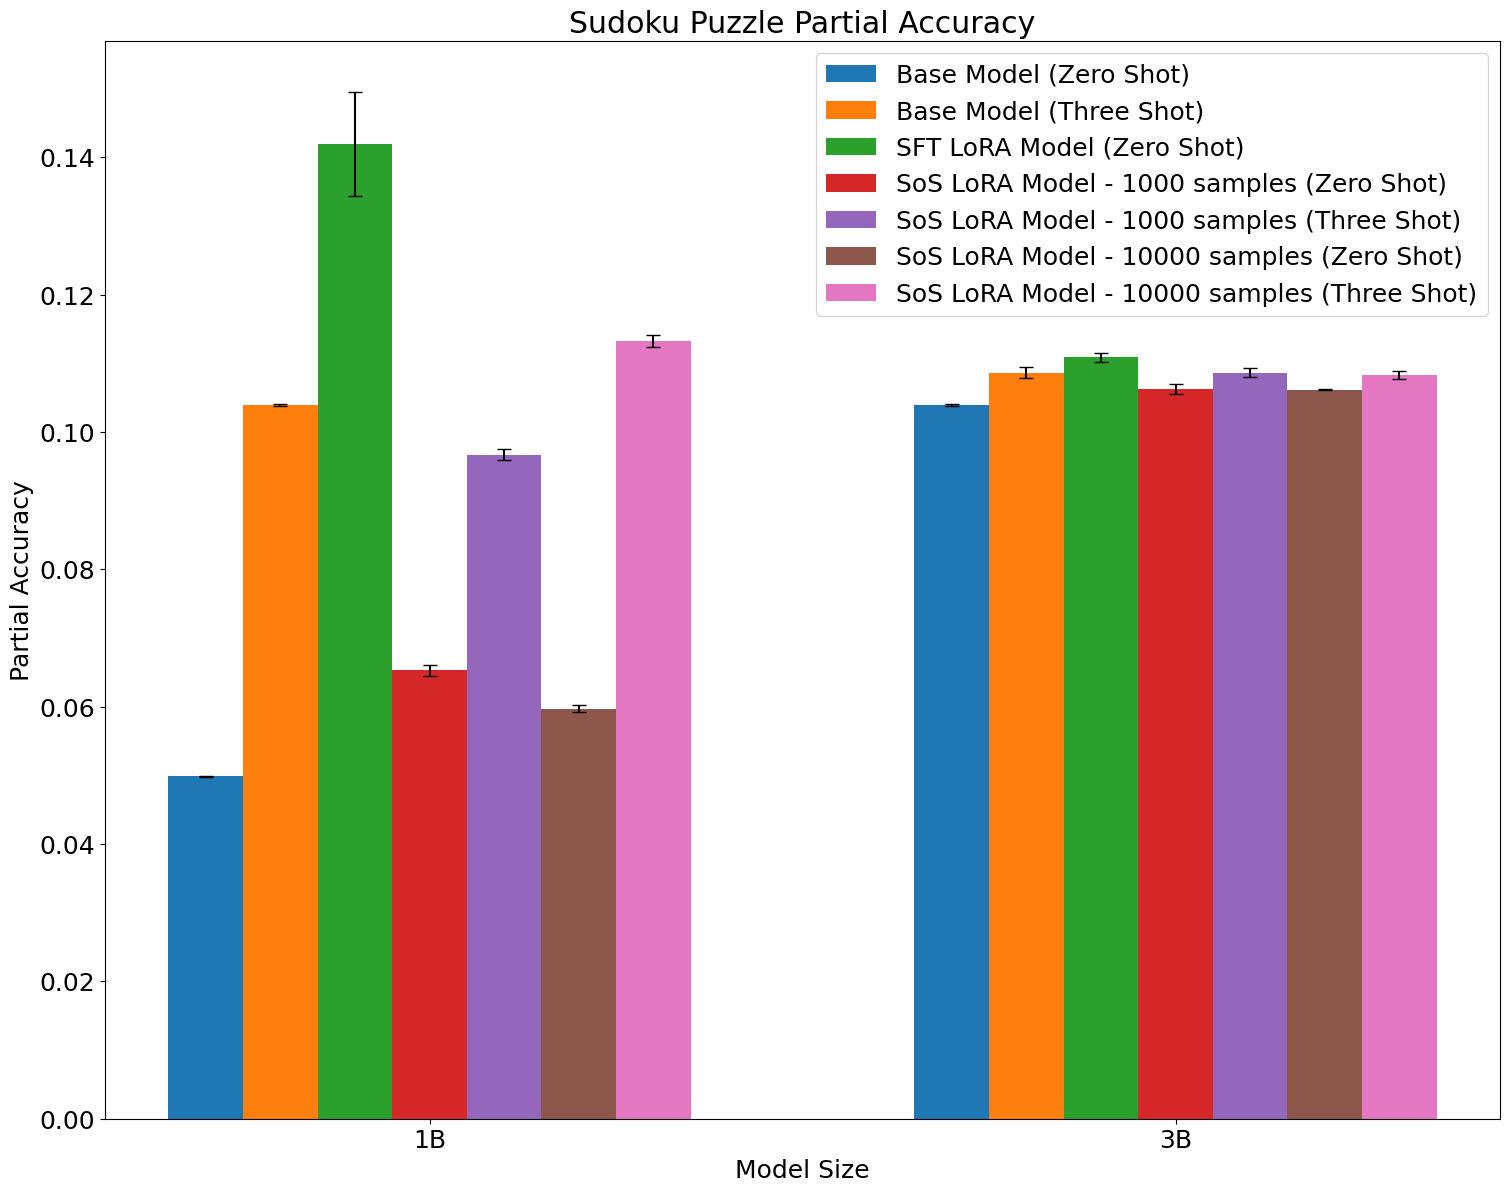

In [61]:
plot_results(sudoku_runs, 'eval/partial_accuracy', 'Sudoku Puzzle Partial Accuracy', 'Partial Accuracy', legend_loc='upper right')